## Data science notebooks & data analysis
Notebooks are great for interactive data analysis. Let's create a pandas DataFrame using the `read_csv()` function. 

We will load the dataset "sales_data.csv" containing three months of sales data for the company. We use the `parse_dates` option to ensure that the "date" column is loaded correctly.

By using the `head()` command, we display the first five rows of data:

In [2]:
# Importing the pandas module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the sales data
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## Data analysis example:

Find the total sales for each warehouse. 

We can use `groupby` to group the information by the column "warehouse". Then we select the column "total" and use `.sum()` to add the "total" column for each warehouse:

In [3]:
df.groupby('warehouse')[['total']].sum()

,total
warehouse,
Central,141982.88
North,100203.63
West,46926.49


## Data science notebooks & visualizations
Visualizations are very helpful to summarize data and gain insights. A well-crafted chart often conveys information much better than a table.

It is very straightforward to include plots in a data science notebook. For example, let's look at the average number of items purchased by each client type. 

We are using the `matplotlib.pyplot` library for this example. We will run the `.plot()` method on the data we want to display and call `plt.show()` to draw the plot:

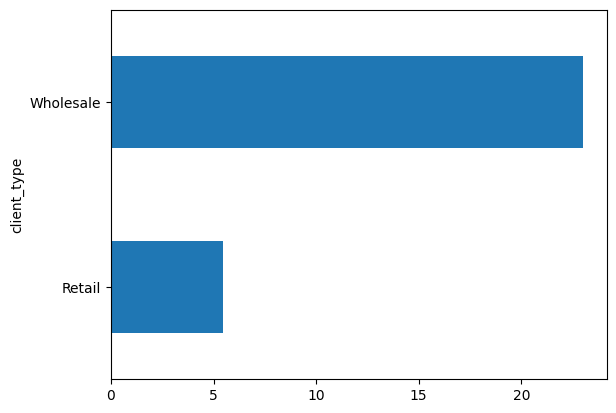

In [4]:

avg_units_client_type = df.groupby('client_type')['quantity'].mean()
avg_units_client_type.plot(kind='barh')
plt.show()

# Reporting on sales data

Now let's now move on to the competition and challenge.

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [5]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

# 1. The total sales for each payment method

In [21]:

df.groupby('payment')[['total']].sum()

,total
payment,
Cash,19199.10
Credit card,110271.57
Transfer,159642.33


#  2. The average unit price for each product line

In [27]:

 #To do the average I have used two mathode
 # Methode1:To get the average the code finds sele count and selling sum first then divede sele count by selling sum.
    
 final_df = pd.DataFrame()
 X_agg = df.groupby('product_line',as_index=False).agg({'unit_price':['count', 'sum']})
 X_agg.columns = ['product_line', 'sale_count', 'selling_sum']
 final_df = pd.concat([final_df, X_agg])
 final_df.groupby('product_line', as_index=False).agg({'sale_count':'sum', 'selling_sum':'sum'})
 final_df['average unit price'] = final_df['selling_sum'].div(final_df['sale_count'].values)
 final_df

,product_line,sale_count,selling_sum,average unit price
0,Breaking system,230,4080.32,17.740522
1,Electrical system,193,4937.93,25.585130
2,Engine,61,3665.60,60.091803
3,Frame & body,166,7110.15,42.832229
4,Miscellaneous,122,2782.91,22.810738
5,Suspension & traction,228,7745.13,33.969868


In [24]:
 # Method2: simply find the average using mean()
 df.groupby('product_line')[['unit_price']].mean()
 


,unit_price
product_line,
Breaking system,17.740522
Electrical system,25.585130
Engine,60.091803
Frame & body,42.832229
Miscellaneous,22.810738
Suspension & traction,33.969868


# Create plots to visualize findings for the first and second finding

<Figure size 1000x500 with 0 Axes>

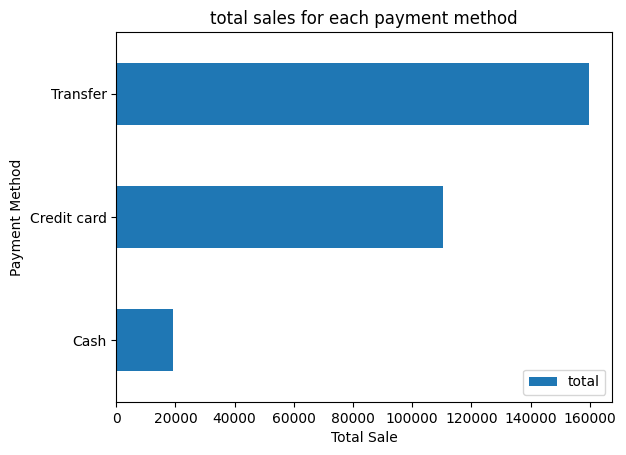

In [25]:
# For the first
plt.figure(figsize = (10, 5))
total_sales_for_each_paymentMethod = df.groupby('payment')[['total']].sum()
total_sales_for_each_paymentMethod.plot(kind='barh')
plt.ylabel('Payment Method')
plt.xlabel('Total Sale')
plt.title('total sales for each payment method')
plt.show()



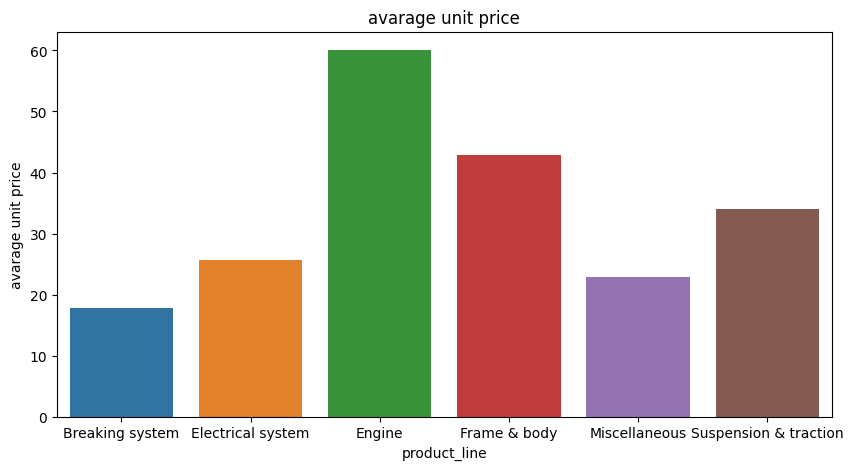

In [28]:
#For question2 Method1
plt.figure(figsize = (10, 5))
sns.barplot(x= final_df['product_line'], y=final_df['average unit price'])
#set the y axis label
plt.ylabel('avarage unit price')
plt.xlabel('product_line')
plt.title('avarage unit price')
plt.show()

<Figure size 1000x500 with 0 Axes>

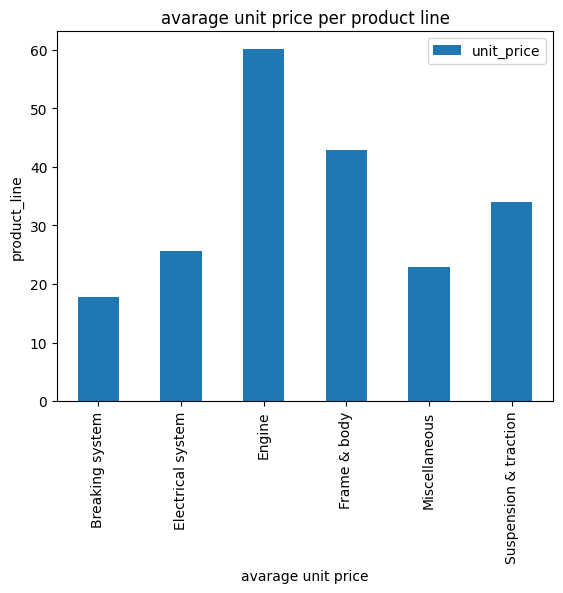

In [29]:
#For question2 Method2
plt.figure(figsize = (10, 5))
avarage_unitPrice_for_productLine=df.groupby('product_line')[['unit_price']].mean()
avarage_unitPrice_for_productLine.plot(kind='bar') 
#set the y axis label
plt.ylabel('product_line')
plt.xlabel('avarage unit price')
plt.title('avarage unit price per product line')
plt.show()

# 4. Investigate  average purchase value by client type and total purchase value by product line
 

In [3]:
#average purchase value by client type
df.groupby('client_type')[['total']].mean()

,total
client_type,
Retail,167.058929
Wholesale,709.521467


In [4]:
#total purchase value by product line
df.groupby('product_line')[['total']].sum()

,total
product_line,
Breaking system,38350.15
Electrical system,43612.71
Engine,37945.38
Frame & body,69024.73
Miscellaneous,27165.82
Suspension & traction,73014.21


<Figure size 1000x500 with 0 Axes>

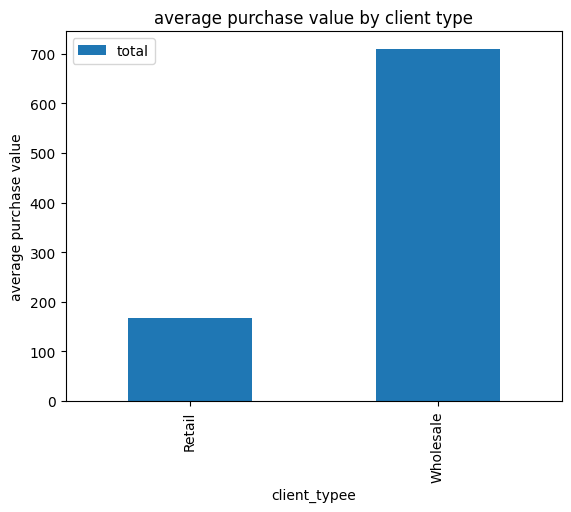

<Figure size 1000x500 with 0 Axes>

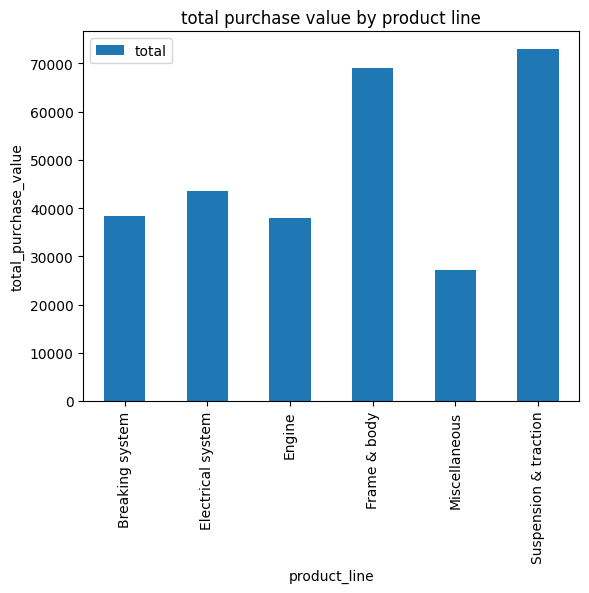

In [6]:
#plot graph for average purchase value by client type
plt.figure(figsize = (10, 5))
average_purchase_value_by_client_type = df.groupby('client_type')[['total']].mean()
average_purchase_value_by_client_type.plot(kind='bar')
plt.ylabel('average purchase value')
plt.xlabel('client_typee')
plt.title('average purchase value by client type')
plt.show()

#plot graph for total purchase value by product line
plt.figure(figsize = (10, 5))
total_purchase_value_by_product_line=df.groupby('product_line')[['total']].sum()
total_purchase_value_by_product_line.plot(kind='bar')
#set the y axis label
plt.ylabel('total_purchase_value')
plt.xlabel('product_line')
plt.title('total purchase value by product line')
plt.show()

# Summarize the findings.

- Among the three warehouses of the company North warehouse have higher total sales whereas west warehouse has lowast total seles.
- Highest average number of items purchased and highest average purchase value by Wholesale clients are highley greater than retail cliants.
- More than 160,000 sale payments are performed by transfer. It indicats that transfer is the most preferable payment method.
- Engine has highest average unit price. How ever Suspension & traction have the highest total purchase value.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

# 3. Create plots to visualize findings for the first and second finding

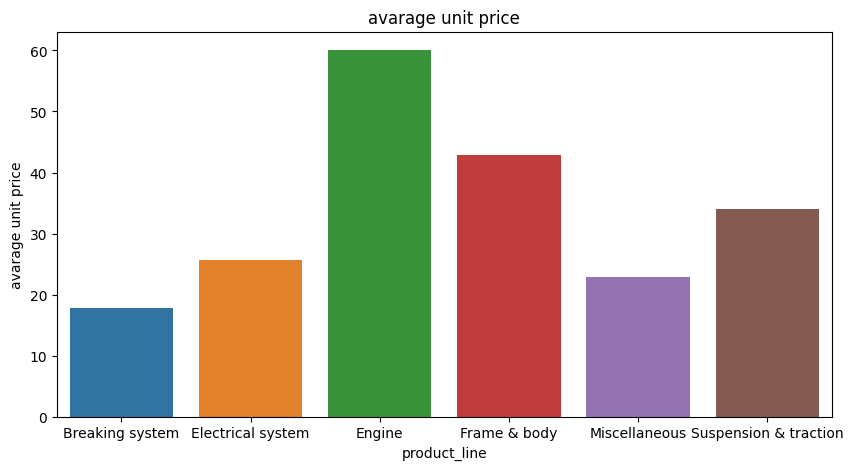

In [ ]:
#For question2 Method1
plt.figure(figsize = (10, 5))
sns.barplot(x= final_df['product_line'], y=final_df['average unit price'])
#set the y axis label
plt.ylabel('avarage unit price')
plt.xlabel('product_line')
plt.title('avarage unit price')
plt.show()

# Summarize the findings.

- Among the three warehouses of the company North warehouse have higher total sales whereas west warehouse has lowast total seles.
-  highest average number of items purchased and highest average purchase value by Wholesale clients are highley greater than retail cliants. 
- More than 160,000 sale payments are performed by transfer. It indicats that transfer is the most preferable payment method. 
- Engine has highest average unit price. How ever Suspension & traction have the highest total purchase value.